In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv('winequality.csv')

## Data Wrangling

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#Cheking if there are null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Axes: >

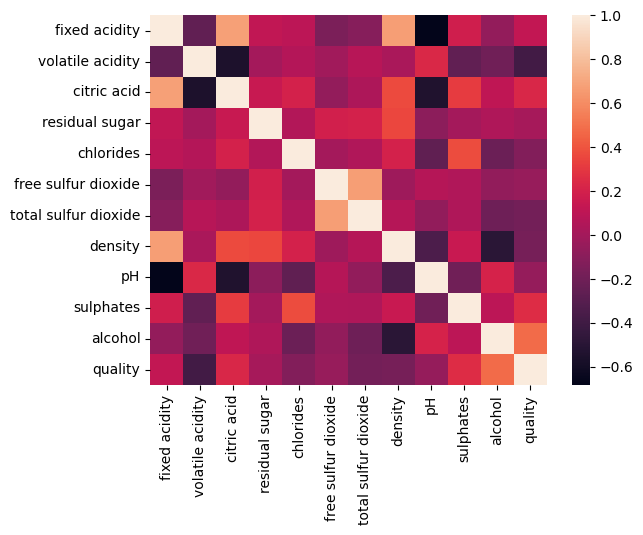

In [9]:
sns.heatmap(wine.corr())

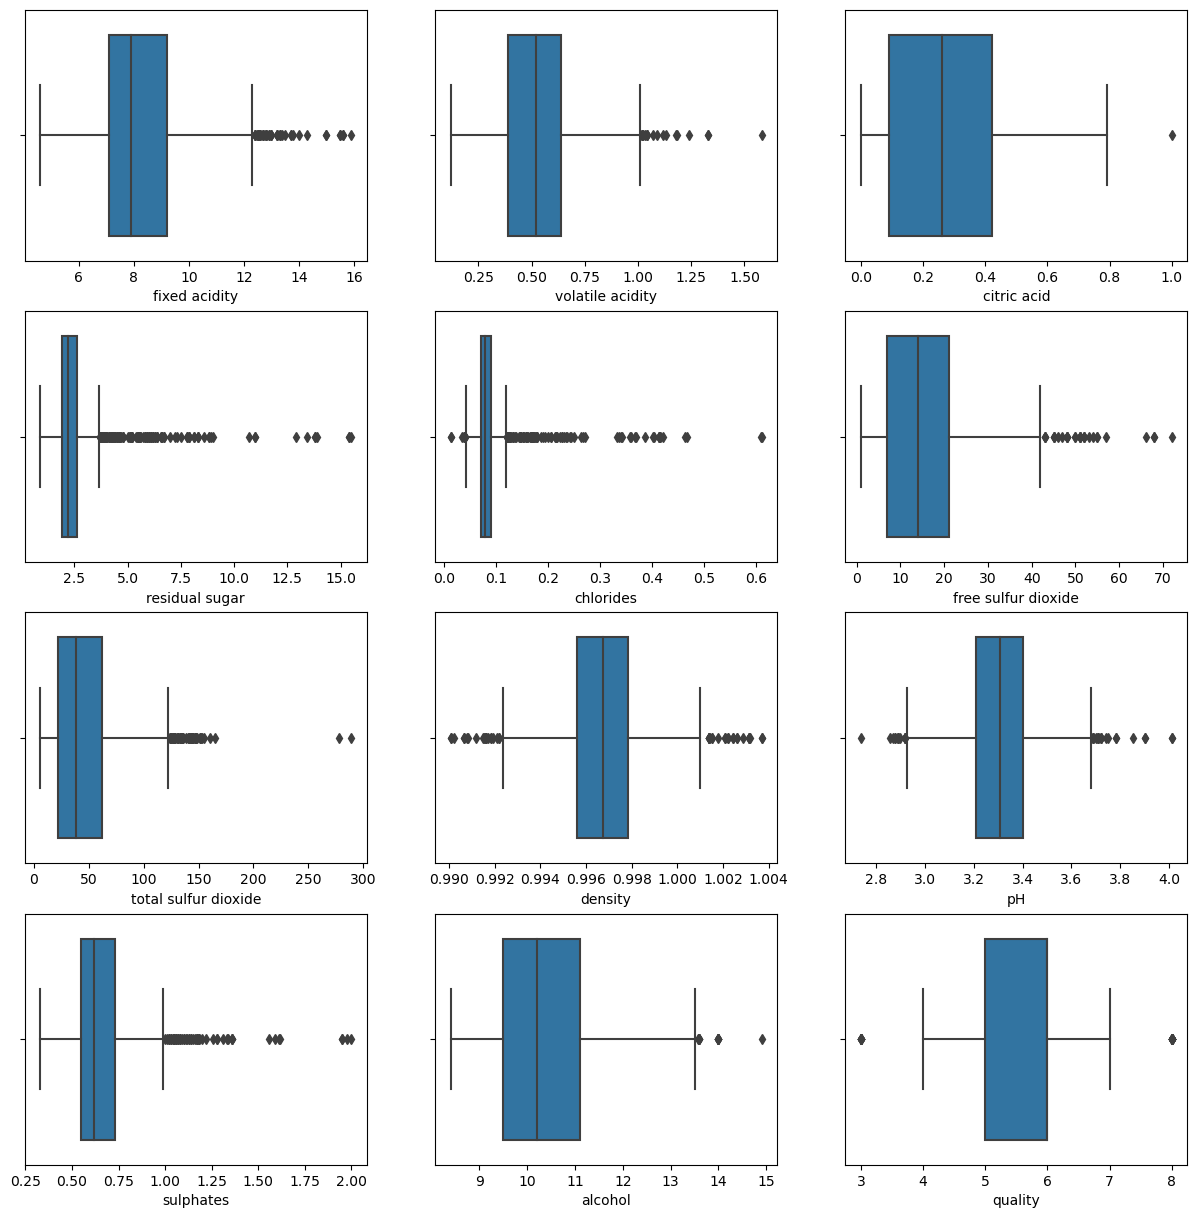

In [10]:
plt.figure(figsize=(15,15))
pltnum=1
for columns in wine:
    if pltnum <= 12:
        ax=plt.subplot(4,3,pltnum)
        sns.boxplot(x=wine[columns])
    pltnum=pltnum+1

The dataset contains a lot of outliers. In order to normalize the data, they need to be remove at least the extreme outliers

In [11]:
quant = [[i, wine[i].quantile(0.25), wine[i].quantile(0.75),
              round(wine[i].quantile(0.75) - wine[i].quantile(0.25), 4)] for i in wine.columns]
quantiles = pd.DataFrame(quant, columns= ['qualities', 'first_quantile', 'Third_quantile', 'IQR'])
quantiles

,qualities,first_quantile,Third_quantile,IQR
0,fixed acidity,7.1000,9.200000,2.1000
1,volatile acidity,0.3900,0.640000,0.2500
2,citric acid,0.0900,0.420000,0.3300
3,residual sugar,1.9000,2.600000,0.7000
4,chlorides,0.0700,0.090000,0.0200
5,free sulfur dioxide,7.0000,21.000000,14.0000
6,total sulfur dioxide,22.0000,62.000000,40.0000
7,density,0.9956,0.997835,0.0022
8,pH,3.2100,3.400000,0.1900
9,sulphates,0.5500,0.730000,0.1800


In [12]:
df = wine.copy()

In [13]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
# We take out outliers by calculating outliers > (Q3 + IQR * 1.5) ^ outliers < Q1 - (IQR * 1.5)
for i in df.columns:
    df = df[(df[i] < df[i].quantile(0.75) +
                              (df[i].quantile(0.75) - df[i].quantile(0.25))*1.5) &
              (df[i] > (df[i].quantile(0.25) -
                               (df[i].quantile(0.75) - df[i].quantile(0.25))*1.5))]

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1124.000000,1124.000000,1124.00000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,8.143950,0.522678,0.24508,2.179537,0.078376,14.812278,41.104093,0.996577,3.325667,0.627580,10.342823,5.622776
std,1.444876,0.164194,0.17996,0.437907,0.013766,8.583848,24.661787,0.001559,0.130154,0.111864,0.947403,0.723635
min,5.100000,0.120000,0.00000,1.200000,0.042000,1.000000,6.000000,0.992560,2.980000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.08000,1.900000,0.069750,8.000000,22.000000,0.995520,3.237500,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.24000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.39000,2.400000,0.087000,20.000000,54.000000,0.997500,3.402500,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.73000,3.600000,0.116000,40.000000,113.000000,1.000400,3.680000,0.940000,13.000000,7.000000


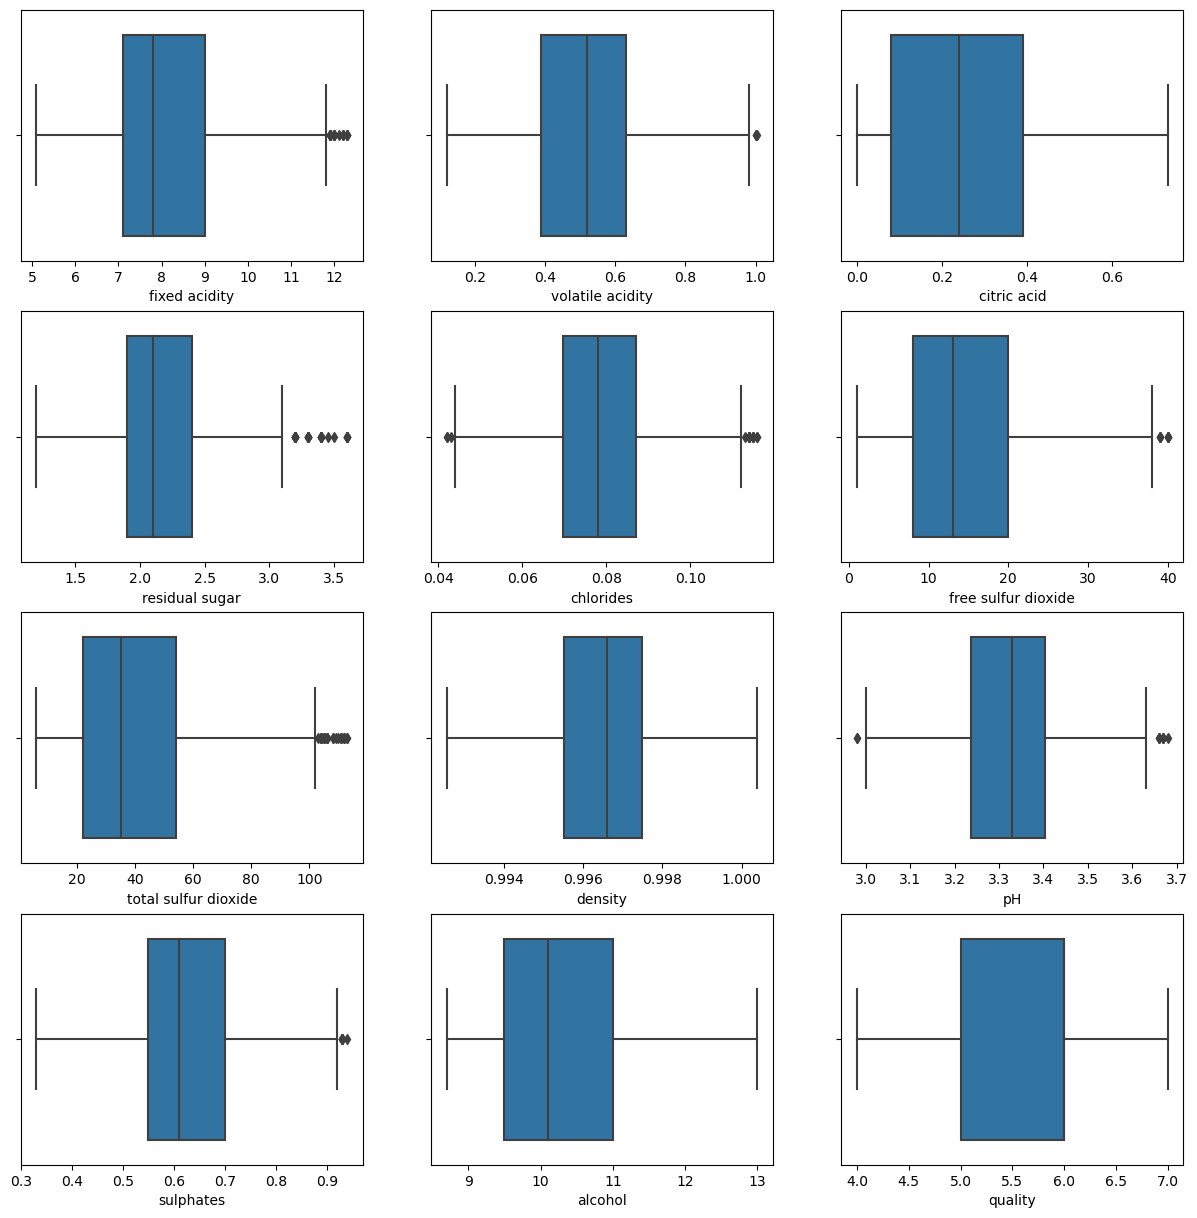

In [16]:
plt.figure(figsize=(15,15))
pltnum=1
for columns in df:
    if pltnum <= 12:
        ax=plt.subplot(4,3,pltnum)
        sns.boxplot(x=df[columns])
    pltnum=pltnum+1

<Axes: >

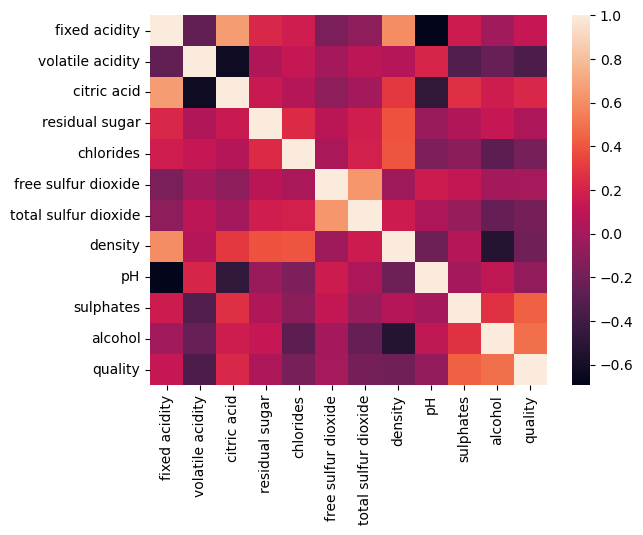

In [17]:
sns.heatmap(df.corr())

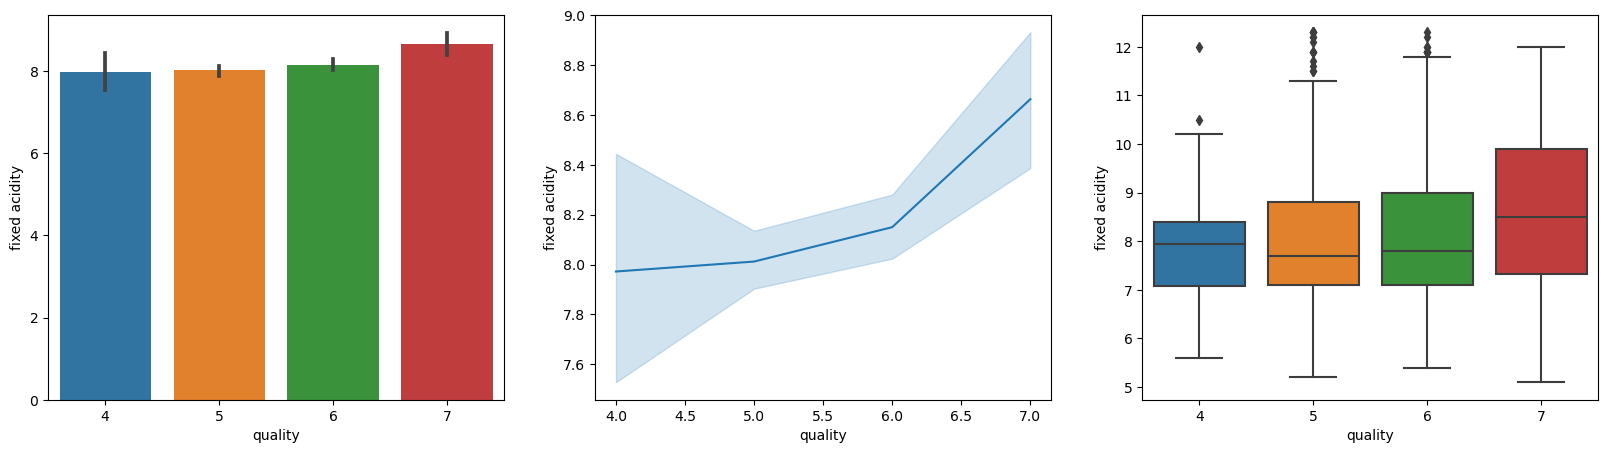

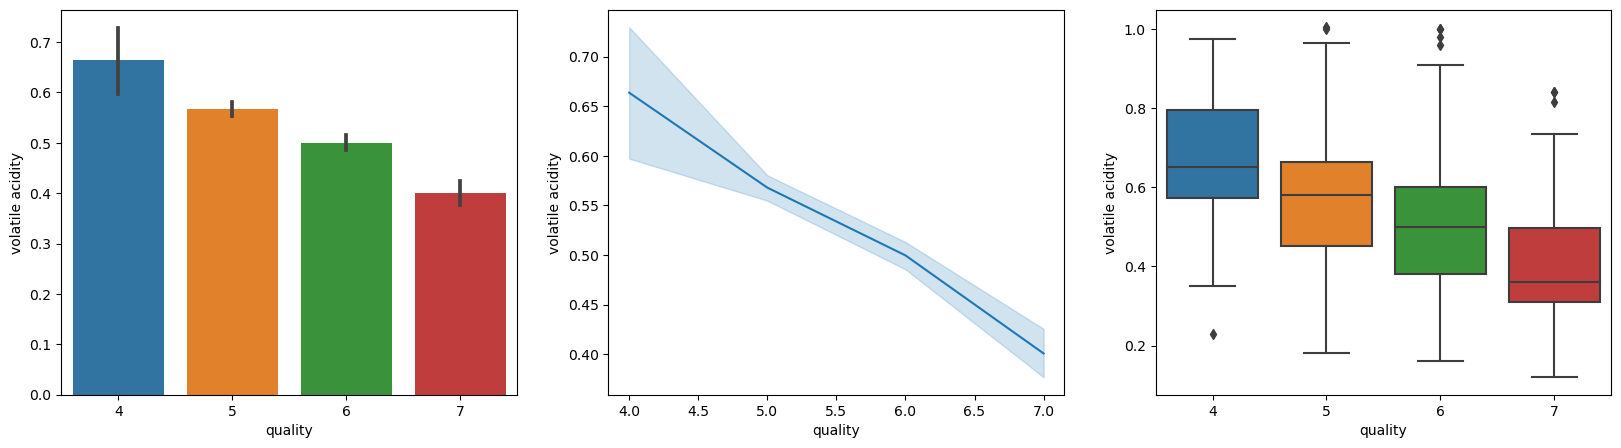

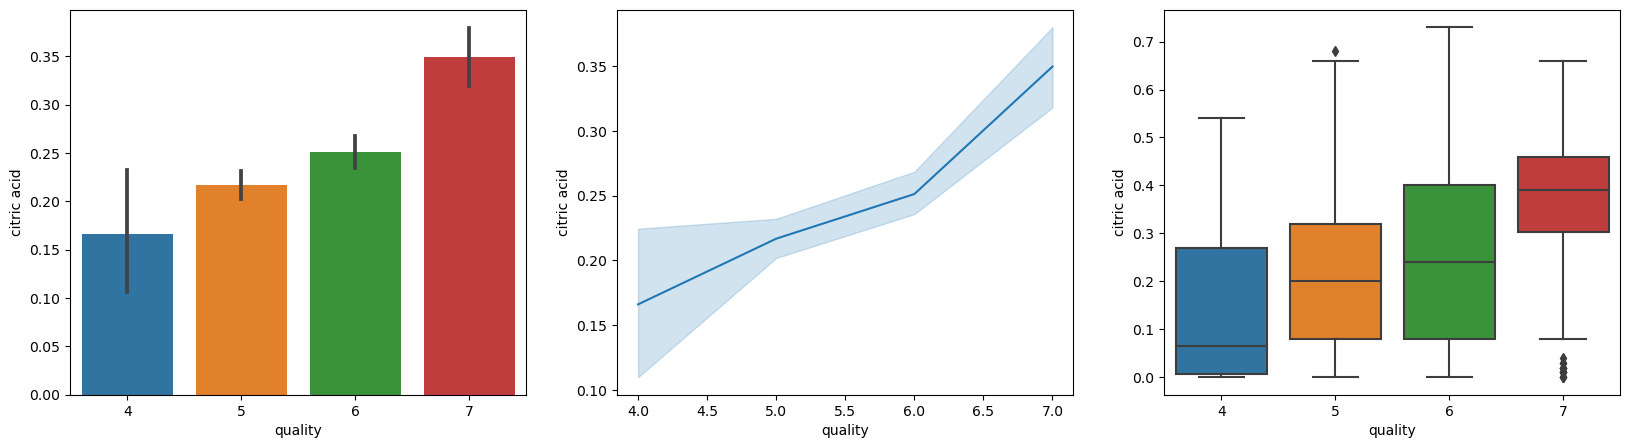

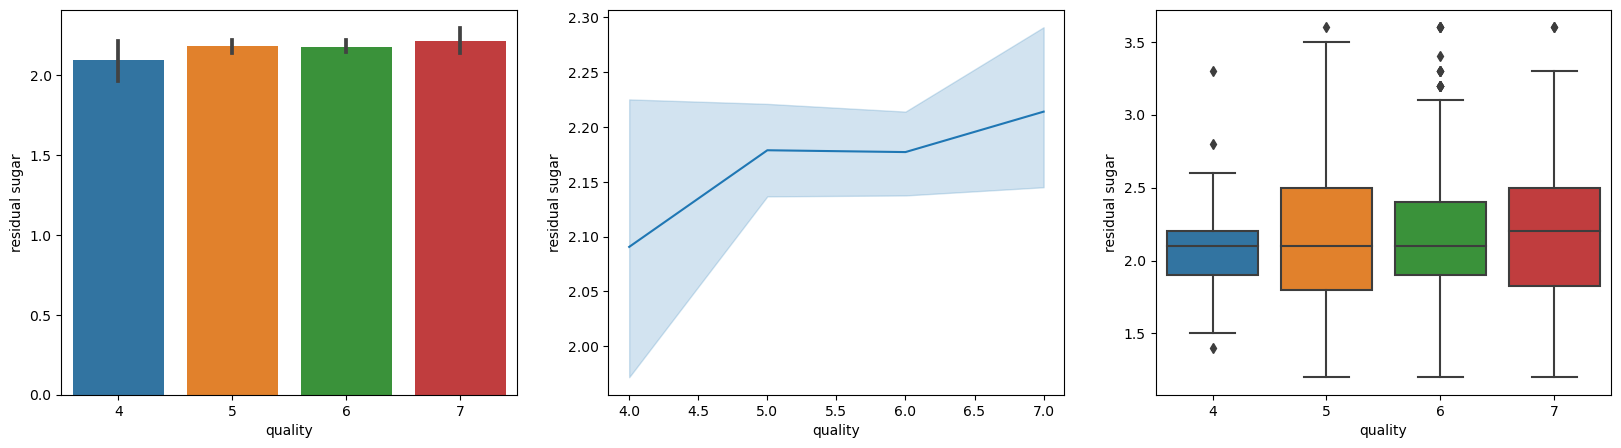

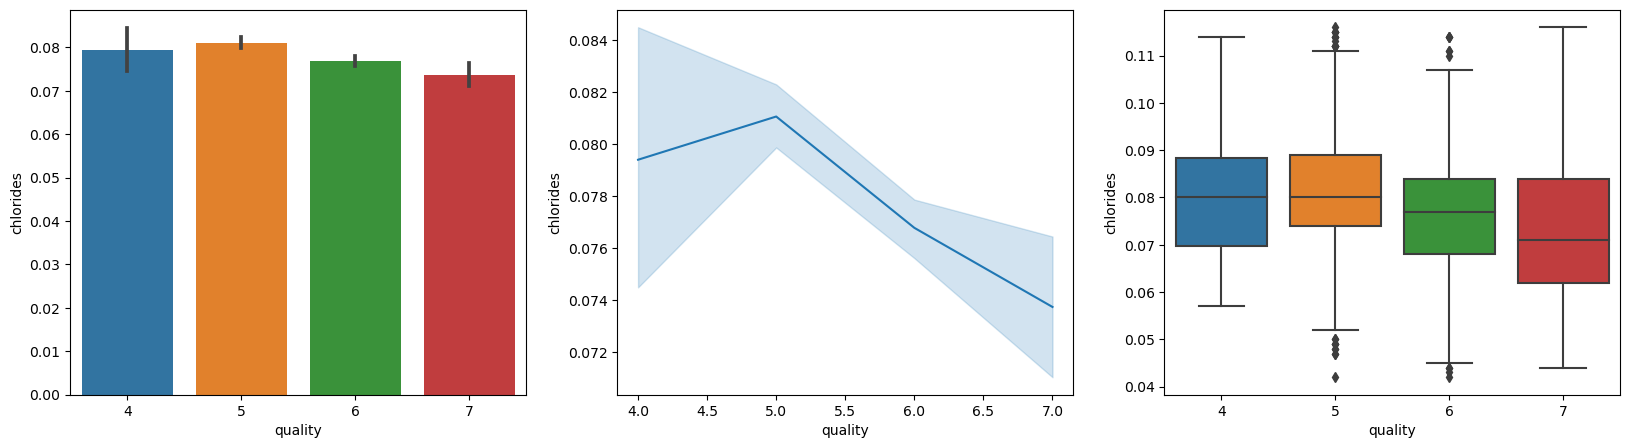

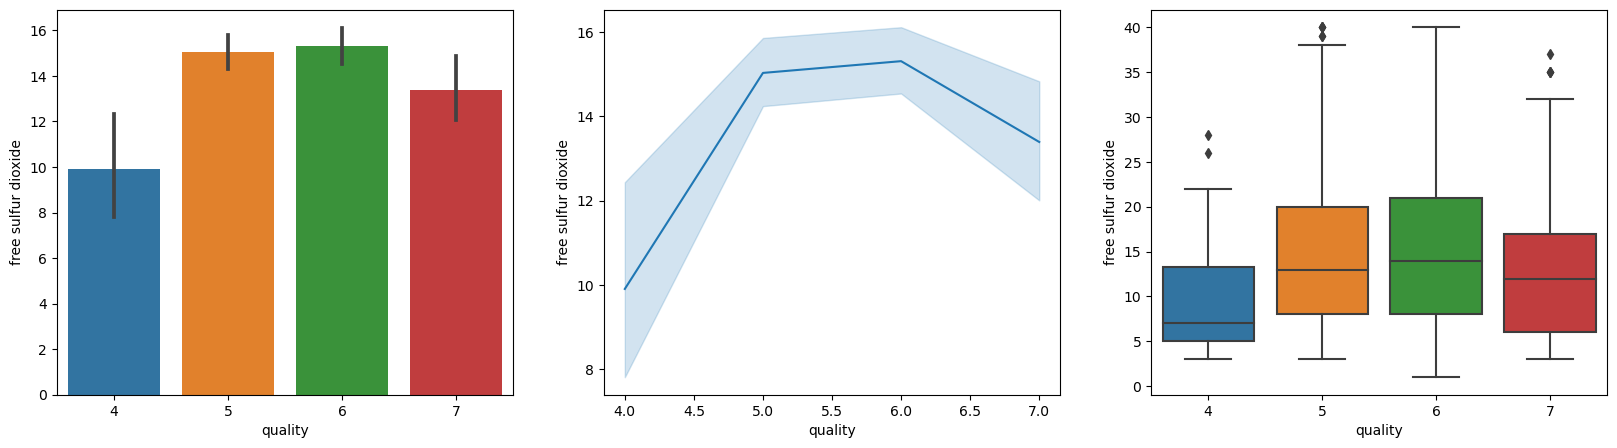

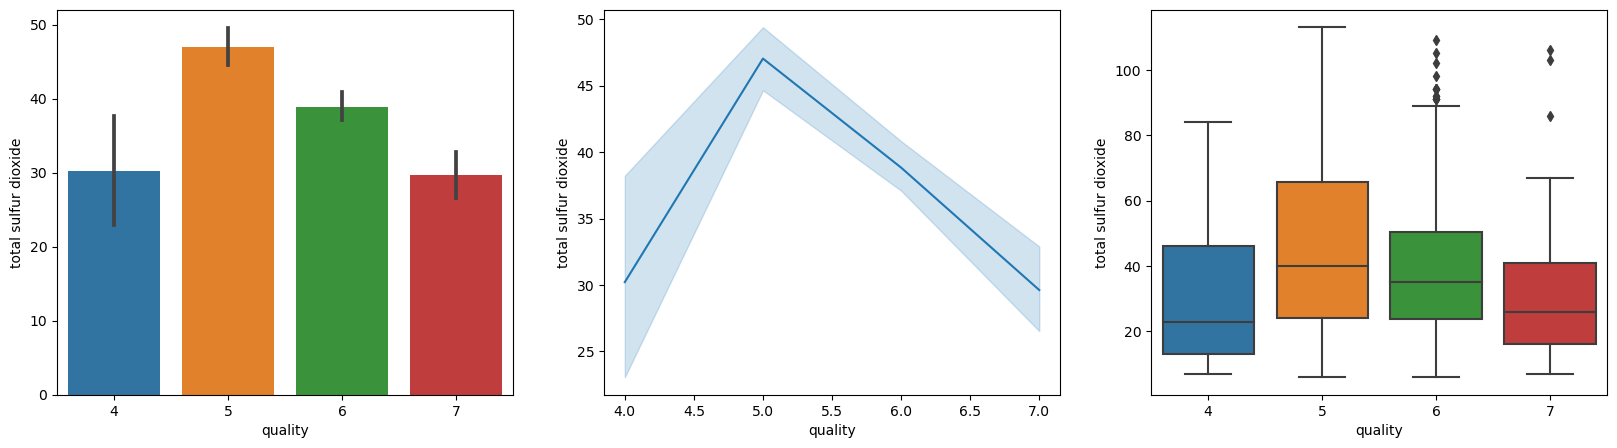

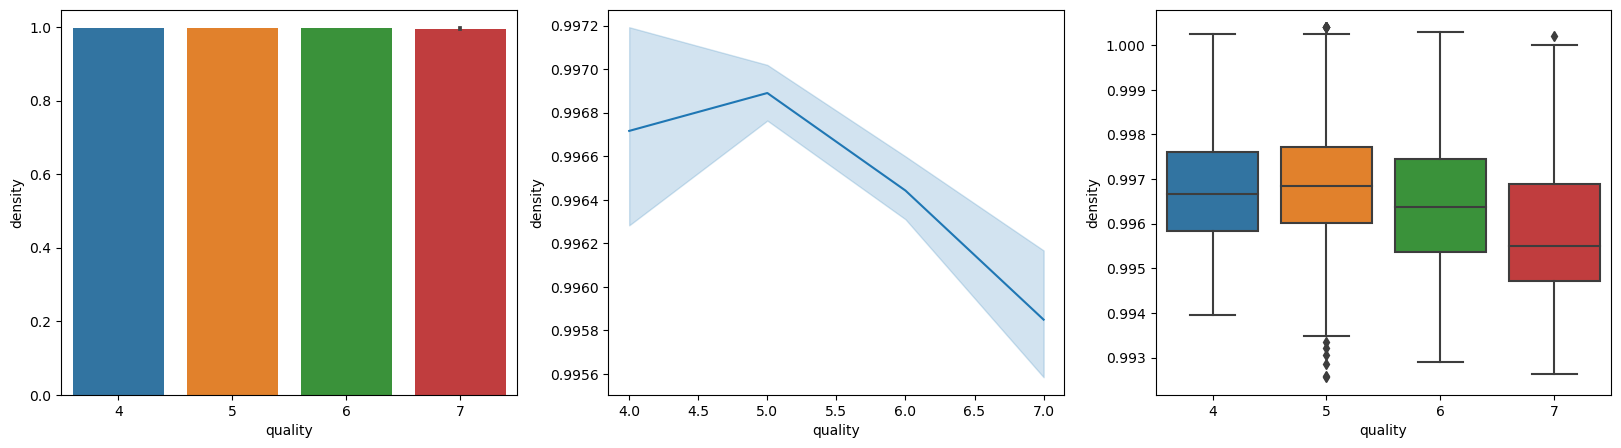

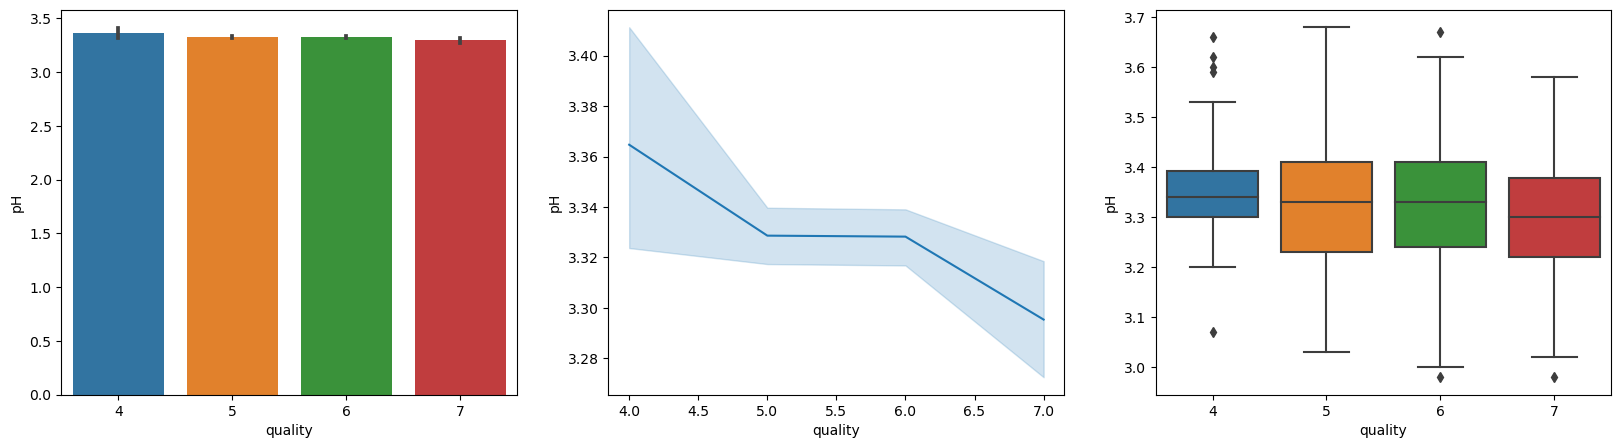

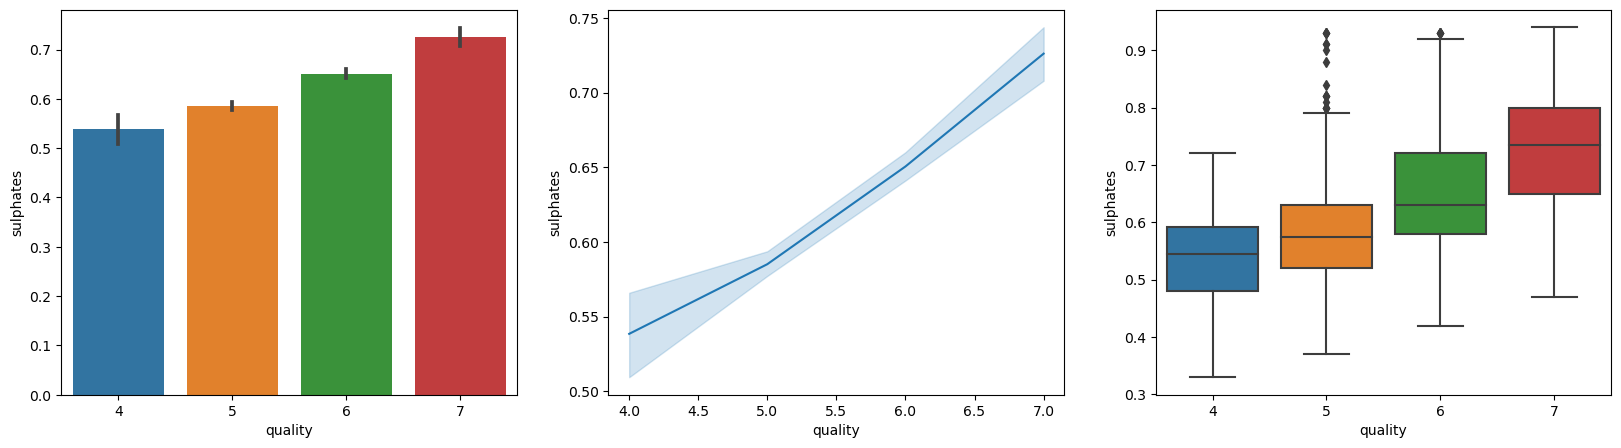

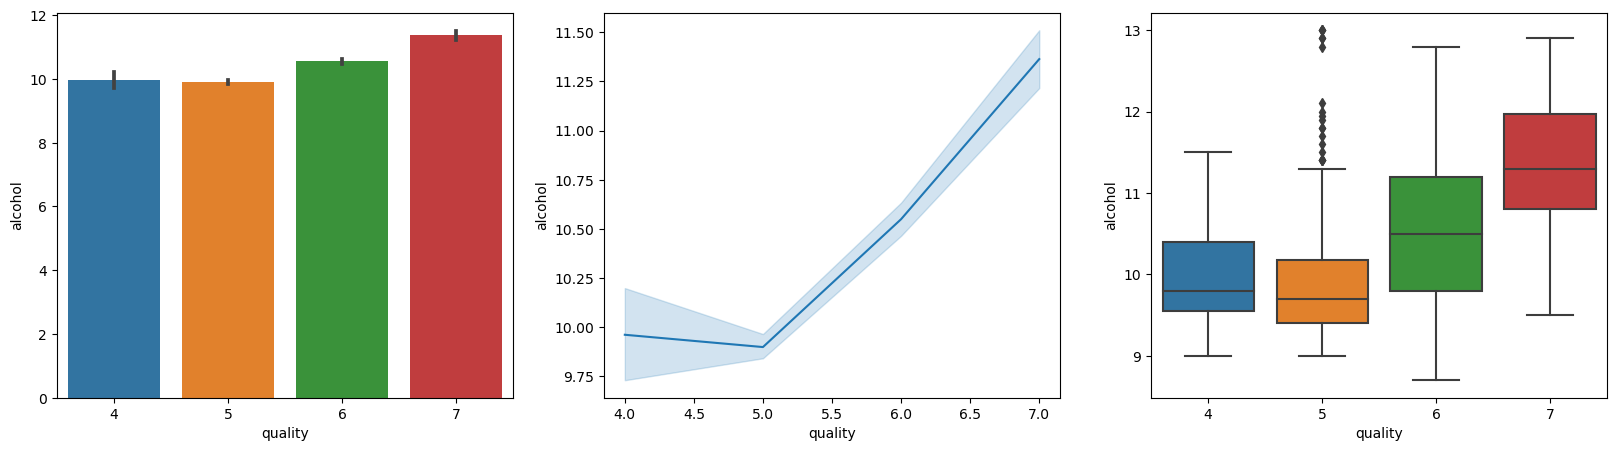

In [18]:
#Here we use all of the columns but quality because it will be our dependent variable
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(20,5))
    sns.barplot(data=df,x='quality',y=df[i],ax=ax[0])
    sns.lineplot(data=df,x='quality',y=df[i],ax=ax[1])
    sns.boxplot(data=df,x='quality',y=df[i],ax=ax[2])